In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

data = pd.read_csv("fires_thefts.csv")

x = data["6.2"].to_numpy()
y = data["29"].to_numpy()

m, n_plus_1 = data.values.shape
n = n_plus_1 - 1

In [6]:
def h(theta, x):
    return theta[0] + theta[1] * x

def J(h, theta, x, y):
    """Funkcja kosztu"""
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

def costfun(fun, x, y):
    return lambda theta: J(fun, theta, x, y)

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # zapiszmy wartości kosztu i parametrów, by potem zrobić wykres
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history

In [7]:
theta_start = np.zeros((n + 1, 1))

epss = [10.0**n for n in range(-1, 5)]
costs = []
lengths = []

for eps in epss:
    theta_best, history = gradient_descent(
        h, J, theta_start, x, y, alpha=0.001, eps=eps
    )
    cost = history[-1][0]
    steps = len(history)
    print('Eps: ',eps, 'Cost: ', cost, 'Steps: ', steps)
    costs.append(cost)
    lengths.append(steps)

Eps:  0.1 Cost:  [234.33113622] Steps:  15
Eps:  1.0 Cost:  [235.86258019] Steps:  11
Eps:  10.0 Cost:  [251.15924463] Steps:  7
Eps:  100.0 Cost:  [416.60006291] Steps:  3
Eps:  1000.0 Cost:  [835.7195122] Steps:  1
Eps:  10000.0 Cost:  [835.7195122] Steps:  1


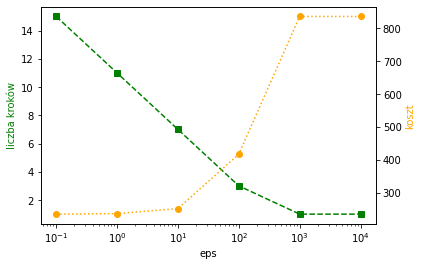

In [28]:
#zaleznosc pomiedzy kosztem a eps - żółta linia
#zaleznosc pomiedzy liczba krokow a eps - zielona linia

def eps_cost_steps_plot(eps, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()

eps_cost_steps_plot(epss, costs, lengths)

In [8]:
#eps po analizie powinnien wynosic 10^1 cost=251.16 steps=7
#alpha powinna wynosic 0.001

theta_start = np.zeros((n + 1, 1))
theta_best, history = gradient_descent(
    h, J, theta_start, x, y, alpha=0.001, eps=10
)
print(f"Liczba kroków: {len(history)}\n")
print('Koszt: ', history[-1][0], '\n')
print('Paremetry krzywej regresywnej:\n')
print(f"theta0: {theta_best[0]}, theta1: {theta_best[1]}\n")


for i in [50,100,200]:
    
    predicted_y = h(theta_best, i)
    print(f'Liczba pożarów: {i}, Liczba włamań {predicted_y}\n')

Liczba kroków: 7

Koszt:  [251.15924463] 

Paremetry krzywej regresywnej:

theta0: [0.1361727], theta1: [1.88653448]

Liczba pożarów: 50, Liczba włamań [94.46289651]

Liczba pożarów: 100, Liczba włamań [188.78962031]

Liczba pożarów: 200, Liczba włamań [377.44306793]

